In [197]:
# !pip install panel
# !pip install plotly

In [198]:
# imports

import panel as pn
pn.extension('plotly')
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
import plotly.graph_objs as go
import seaborn as sns
import holoviews as hv
warnings.filterwarnings('ignore')

# Read in coordinate data

In [199]:
df_path = Path('all_df.csv')
all_df = pd.read_csv(df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [200]:
all_df.head()

,corn,soybean_meal,hog,crush
Date,,,,
2000-12-29,2.6175,176.3,47.50,95107.5
2001-01-02,2.5825,176.4,47.80,96582.5
2001-01-03,2.6100,175.2,47.15,94210.0
2001-01-04,2.6100,173.8,48.00,97070.0
2001-01-05,2.5800,171.7,48.00,97730.0


In [201]:
def create_viz1():
    corrM = all_df.corr()

    mask = np.zeros_like(corrM)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10,7))
        ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")
    return f

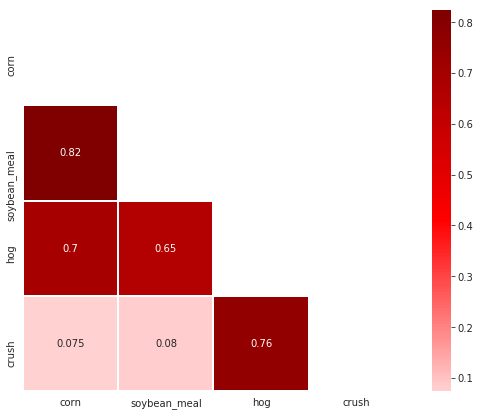

In [202]:
a = create_viz1()

In [203]:
all_df.head()

,corn,soybean_meal,hog,crush
Date,,,,
2000-12-29,2.6175,176.3,47.50,95107.5
2001-01-02,2.5825,176.4,47.80,96582.5
2001-01-03,2.6100,175.2,47.15,94210.0
2001-01-04,2.6100,173.8,48.00,97070.0
2001-01-05,2.5800,171.7,48.00,97730.0


In [204]:
def crush_by_date():
    
    return all_df.hvplot(x='Date', y='crush')

In [205]:
B = crush_by_date()

In [206]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [207]:
def standard_scaler():
    std_scaler = StandardScaler()

    lh_df_std_scaled = std_scaler.fit_transform(all_df.to_numpy())
    lh_df_std_scaled = pd.DataFrame(lh_df_std_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

    return lh_df_std_scaled.hvplot()

In [208]:
def minmax_scaler():
    mm_scaler = MinMaxScaler()
    lh_df_mm_scaled = mm_scaler.fit_transform(all_df.to_numpy())
    lh_df_mm_scaled = pd.DataFrame(lh_df_mm_scaled, columns = ['crush', 'hog', 'soybean_meal', 'corn'])

    return lh_df_mm_scaled.hvplot()

In [209]:
def lh_df_adj_totals():
    df = pd.read_csv("lh_df_adj_totals.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
    return df.hvplot(x='Date', y=['hog', 'corn + soybean_meal'])

In [210]:
def func_02():
    mean_line = hv.HLine(all_df['crush'].mean())
    mean_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
    plot = all_df.hvplot(x='Date', y='crush', yformatter='%.0f')
    return plot * mean_line

In [212]:

def zscore(series):
    return (series - series.mean()) / np.std(series)
    all_df2 = all_df.copy()
    all_df2['Z-Score'] = zscore(all_df2['crush'])
    

def func_03():


    zscore_plot = all_df2.hvplot(x='Date', y=['Z-Score'])
    z_zero_line = hv.HLine(0)
    z_zero_line.opts(color = 'black', line_dash = 'dashed', line_width=2.0)
    z_plus_one = hv.HLine(1)
    z_plus_one.opts(color = 'orange', line_dash = 'dashed', line_width=2.0)
    z_minus_one = hv.HLine(-1)
    z_minus_one.opts(color = 'green', line_dash = 'dashed', line_width=2.0)
    z_plus_two = hv.HLine(2)
    z_plus_two.opts(color = 'red', line_dash = 'dashed', line_width=2.0)
    z_minus_two = hv.HLine(-2)
    z_minus_two.opts(color = 'purple', line_dash = 'dashed', line_width=2.0)

    return zscore_plot * z_zero_line * z_plus_one * z_minus_one * z_plus_two * z_minus_two


In [213]:
def func_04():
    train = all_df2.copy()
    feature_train = train['Z-Score']

    ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
    ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
    std_60 = feature_train.rolling(window=60, center=False).std()
    zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
#     plt.figure(figsize=(12, 6))
#     plt.plot(feature_train.index, feature_train.values)
#     plt.plot(ratios_mavg5.index, ratios_mavg5.values)
#     plt.plot(ratios_mavg60.index, ratios_mavg60.values)
#     plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
#     plt.ylabel('Z-Score')
    a = feature_train.hvplot(title="Ratio")
    b = ratios_mavg5.dropna().hvplot()
    c = ratios_mavg60.dropna().hvplot()


#     plt.show()
    return a*b*c

In [214]:
train = all_df2.copy()
feature_train = train['Z-Score']

ratios_mavg5 = feature_train.rolling(window=5, center=False).mean()
ratios_mavg60 = feature_train.rolling(window=60, center=False).mean()
std_60 = feature_train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
a = feature_train.hvplot(title="Ratio")
b = ratios_mavg5.dropna().hvplot()
c = ratios_mavg60.dropna().hvplot()

# plt.plot(ratios_mavg5.index, ratios_mavg5.values)
# plt.plot(ratios_mavg60.index, ratios_mavg60.values)
# plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
# plt.ylabel('Z-Score')

# plt.show()

In [215]:
a*b*c

:Overlay
   .Curve.Z_hyphen_minus_Score.I   :Curve   [Date]   (Z-Score)
   .Curve.Z_hyphen_minus_Score.II  :Curve   [Date]   (Z-Score)
   .Curve.Z_hyphen_minus_Score.III :Curve   [Date]   (Z-Score)

In [216]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("""
## Agricultural Futures
""")

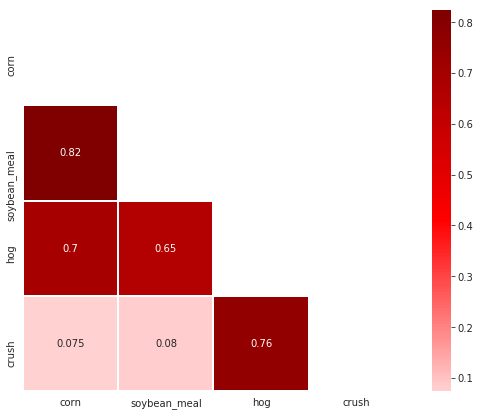

In [217]:
# Create a tab layout for the dashboard

tabs = pn.Tabs(
    ("Crush", pn.Column(crush_by_date)),
    ("Heatmap",pn.Column(create_viz1)),
    ("Mean Line", pn.Column("Func 2", func_02)),
    ("Z Score", pn.Column("Func 3", func_03)),
    ("Adjusted Totals", pn.Column("Mean Points by Team", lh_df_adj_totals))
    #("Standard Scaler", pn.Column(standard_scaler)), 
    #("Min/Max Scaler", pn.Column(minmax_scaler))
)

In [218]:
# Create the dashboard

dashboard = pn.Column(title, tabs)

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Curve, name='interactive51434')
        [1] Column
            [0] Column
                [0] Column()
                [1] Row
                    [0] Matplotlib(Figure, name='interactive51520')
        [2] Column
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Overlay, name='interactive51529')
        [3] Column
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(Overlay, name='interactive51641')
        [4] Column
            [0] Markdown(str)
            [1] Column
                [0] Column()
                [1] Row
                    [0] HoloViews(NdOverlay, name='interactive51850')
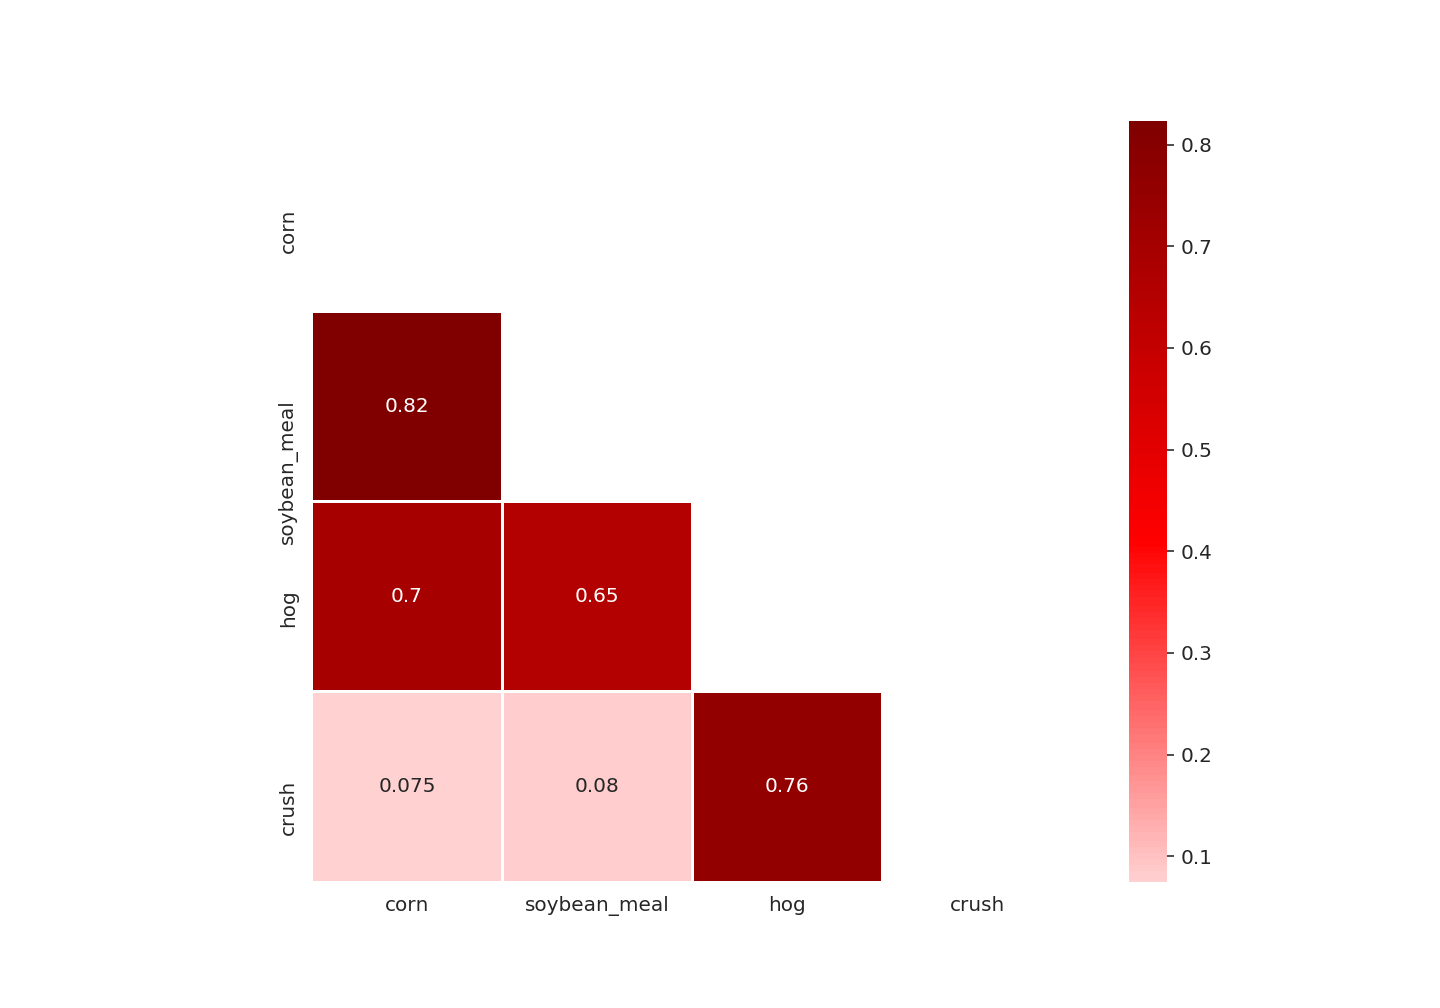

In [219]:
dashboard

In [169]:
# Serve the# dashboard

dashboard.show()

Launching server at http://localhost:61659
